In [1]:
# Impor modul yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


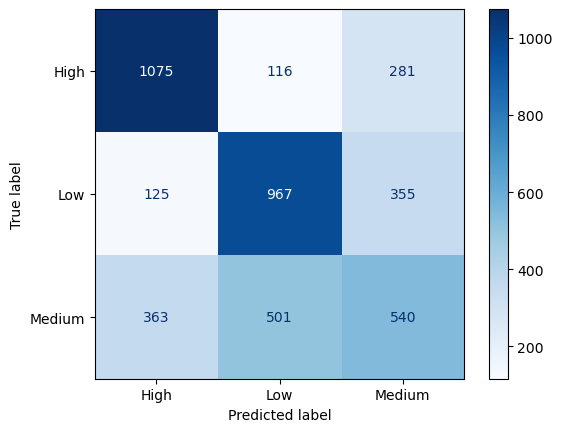

Confusion Matrix:
 [[1075  116  281]
 [ 125  967  355]
 [ 363  501  540]]
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

Classification Report:
               precision    recall  f1-score   support

        High       0.69      0.73      0.71      1472
         Low       0.61      0.67      0.64      1447
      Medium       0.46      0.38      0.42      1404

    accuracy                           0.60      4323
   macro avg       0.59      0.59      0.59      4323
weighted avg       0.59      0.60      0.59      4323



In [9]:
df = pd.read_csv("D:/Belajar/DOC/Semester 3/EDA/Dataset Multivariat/house_data.csv", sep=",")

# Drop kolom yang tidak diperlukan dan mengganti nama variabel
df.drop(['id', 'date', 'bathrooms', 'sqft_above', 'sqft_basement', 'floors', 
         'waterfront', 'view', 'yr_renovated', 'yr_built', 'zipcode', 'lat', 
         'long', 'condition', 'grade', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)
df.rename(columns={'bedrooms': 'x1', 'sqft_living': 'x2', 'sqft_lot': 'x3', 'price': 'y'}, inplace=True)

# Menambahkan klasifikasi label berdasarkan kuantil harga
df['y'] = pd.qcut(df['y'], q=3, labels=['Low', 'Medium', 'High'])

# Memisahkan fitur dan label
X = df[['x1', 'x2', 'x3']]
y = df['y']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menentukan model dan parameter grid untuk GridSearchCV
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Melatih model dengan grid search
grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik dari grid search
best_model = grid_search.best_estimator_

# Confusion Matrix dengan visualisasi
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
# Classification Report
report = classification_report(y_test, y_pred, zero_division=1)
plt.show()
# Membuat prediksi dengan model terbaik
y_pred = best_model.predict(X_test)

# Menampilkan parameter terbaik dan laporan klasifikasi
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", report)


In [11]:
print(df['y'].value_counts())

Low       7226
Medium    7223
High      7164
Name: y, dtype: int64


In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.54314134 0.55517002 0.54869304 0.54349838 0.55946321]


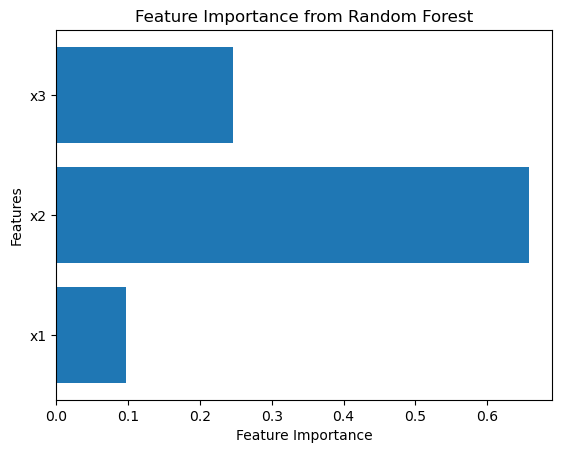

In [15]:
# Menggunakan model yang sudah dilatih
feature_importance = best_model.feature_importances_

# Visualisasi Feature Importance
plt.barh(X.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()


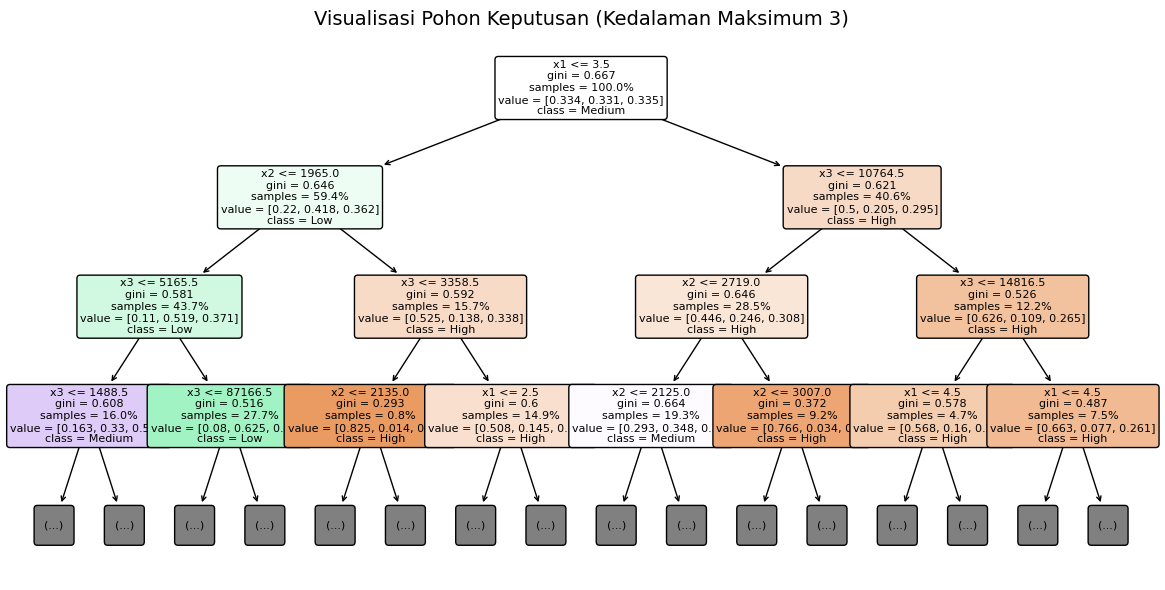

In [19]:
from sklearn.tree import plot_tree

# Pilih salah satu pohon dari Random Forest
tree = best_model.estimators_[0]

# Membatasi kedalaman pohon untuk visualisasi
plt.figure(figsize=(12, 6)) 
plot_tree(
    tree,
    max_depth=3,                     # Membatasi kedalaman pohon
    feature_names=['x1', 'x2', 'x3'],  # Nama fitur
    class_names=list(best_model.classes_),  # Label kelas
    filled=True,                     # Warna mencerminkan kelas dominan
    rounded=True,                    # Membuat simpul pohon lebih rapi
    fontsize=8,                      # Ukuran font
    proportion=True                  # Proporsi pembagian data pada simpul
)

# Menambahkan judul
plt.title("Visualisasi Pohon Keputusan (Kedalaman Maksimum 3)", fontsize=14)
plt.tight_layout()  # Menyesuaikan tata letak
plt.show()
